In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
from enum import IntEnum
from dataclasses import dataclass
from enum import Enum
import copy
from colorthief import ColorThief
import os
from tqdm import tqdm
from pathlib import Path
from pandas.util import hash_pandas_object
import hashlib


In [61]:
df = pd.read_parquet('../../../datasets/cleaned/polyvore_v1.parquet')

# Calculating like / view ratio

In [62]:
df["Ratio"] = df["outfitLikes"] / df["outfitViews"]

In [63]:
df["Ratio"].describe()

count    30370.000000
mean         0.281321
std          1.311706
min          0.000662
25%          0.090909
50%          0.189711
75%          0.314286
max         54.750000
Name: Ratio, dtype: float64

In [64]:
df[df["Ratio"] > 1]

,outfitName,outfitViews,wearType,type,outfitLikes,date,set_id,outfitDesc,clothingItemIndex,clothingItemName,clothingItemPrice,clothingItemLikes,clothingItemCategoryId,imagePath,Ratio
287,bts,7,3.0,outwear,8,6 months,205802546,A fashion look from August 2016 by roffy-1999 ...,1,zizzi pink plus size zip collar leather biker ...,57.00,18680,25,raw/images/205802546/1.jpg,1.142857
288,bts,7,4.0,pants,8,6 months,205802546,A fashion look from August 2016 by roffy-1999 ...,2,lizzie black distressed jean,57.00,8138,237,raw/images/205802546/2.jpg,1.142857
289,bts,7,2.0,top,8,6 months,205802546,A fashion look from August 2016 by roffy-1999 ...,3,river island black cut-out bikini tank top,9.93,1105,2,raw/images/205802546/3.jpg,1.142857
423,Embellished Sleeves,59,2.0,top,79,21 hours,217006074,A fashion look from February 2017 by emcf3548 ...,1,emilio pucci silk tie neck blouse,542.00,152,17,raw/images/217006074/1.jpg,1.338983
424,Embellished Sleeves,59,4.0,skirt,79,21 hours,217006074,A fashion look from February 2017 by emcf3548 ...,2,warehouse ribbed sparkle tube skirt,12.00,5268,7,raw/images/217006074/2.jpg,1.338983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135612,Boho Babyliscious...,5,5.0,shoes,136,18 hours,217010399,A fashion look from February 2017 by hattie4pa...,3,chloé harper lace-up suede ankle boots,1050.00,5,261,raw/images/217010399/3.jpg,27.200000
135613,Boho Babyliscious...,5,1.0,bag,136,18 hours,217010399,A fashion look from February 2017 by hattie4pa...,4,christian louboutin small leather cross-body bag,1650.00,4,37,raw/images/217010399/4.jpg,27.200000
137151,Untitled #2,11,2.0,top,13,11 months,193585667,A fashion look from March 2016 by martats feat...,1,row,1175.00,1914,19,raw/images/193585667/1.jpg,1.181818
137152,Untitled #2,11,4.0,skirt,13,11 months,193585667,A fashion look from March 2016 by martats feat...,2,red jersey line skirt,61.00,1541,9,raw/images/193585667/2.jpg,1.181818


## Visualize Distribution

<Axes: >

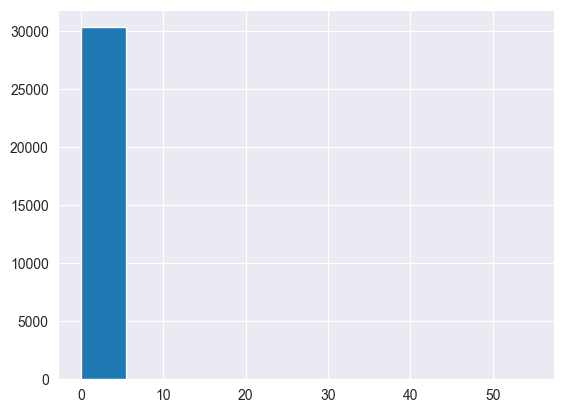

In [5]:
df['Ratio'].hist()

<Axes: >

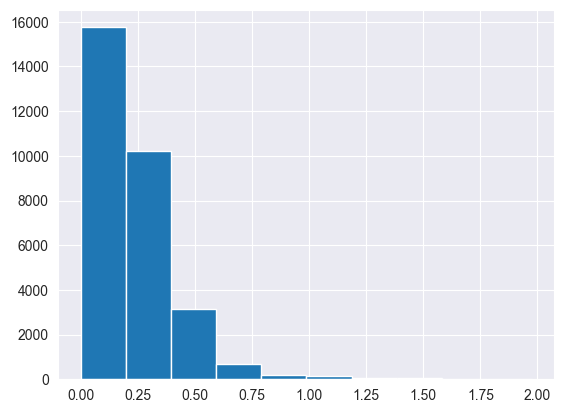

In [6]:
df[df['Ratio'] < 2]['Ratio'].hist()

In [7]:
df = df.drop(df[df["Ratio"] > 1.0].index)

## optimize distribution by taking the logarithm of the ratio

In [8]:
df["Ratio_Log"] = np.log10(df["outfitLikes"] / df["outfitViews"])

<Axes: >

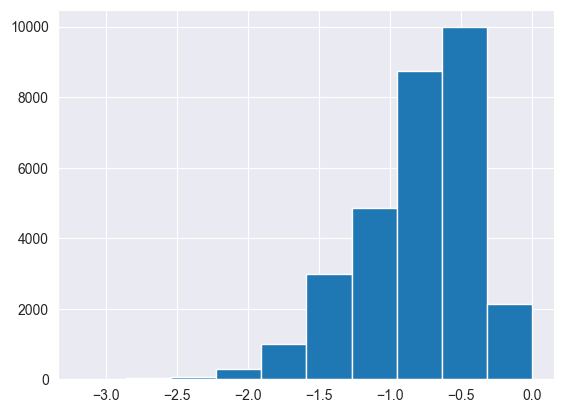

In [9]:
df['Ratio_Log'].hist()

In [10]:
# I want to create a new dataframe with the unique indexes of the setID. So every setID should only appear once.
df_copy = copy.deepcopy(df)
setIDs = df_copy["set_id"].unique()

In [11]:
df.head()

,outfitName,outfitViews,wearType,type,outfitLikes,date,set_id,outfitDesc,clothingItemIndex,clothingItemName,clothingItemPrice,clothingItemLikes,clothingItemCategoryId,imagePath,Ratio,Ratio_Log
7,Being a Vans shoe model with Luke. Idk about t...,188,2.0,top,9,Two years,120161271,A fashion look from April 2014 featuring destr...,1,nirvana distressed t-shirt,10.0,1290,21,raw/images/120161271/1.jpg,0.047872,-1.319915
8,Being a Vans shoe model with Luke. Idk about t...,188,4.0,pants,9,Two years,120161271,A fashion look from April 2014 featuring destr...,2,rag bone rock w/ black skinny jeans,235.0,17406,237,raw/images/120161271/2.jpg,0.047872,-1.319915
15,These Chanel bags is a bad habit .x,562,2.0,top,32,Two years,143656996,12.19.14,1,monki singlet,16.0,20094,104,raw/images/143656996/1.jpg,0.056940,-1.244586
17,These Chanel bags is a bad habit .x,562,4.0,pants,32,Two years,143656996,12.19.14,3,topshop moto joni high rise skinny jeans,65.0,23324,237,raw/images/143656996/3.jpg,0.056940,-1.244586
19,These Chanel bags is a bad habit .x,562,1.0,bag,32,Two years,143656996,12.19.14,5,pre-owned chanel shoulder bag,2450.0,4489,37,raw/images/143656996/5.jpg,0.056940,-1.244586


# Create new dataframe with one row per outfit and items of that outfit as columns

In [12]:
def add_item_to_setID(setID, item, wearType):
    df_setID.loc[setID, f"{wearType} ClothingItemName"] = item["clothingItemName"]
    df_setID.loc[setID, f"{wearType} wearType"] = item["wearType"]
    df_setID.loc[setID, f"{wearType}_imagePath"] = item["imagePath"]


def add_bg_removed_path_to_df(imagePath):
    raw, images, number, file = imagePath.split("/")
    endnumber, end = file.split(".")

    return f"datasets/bg_removed/{number}/{endnumber}.png"


def add_images256x256_path_to_df(imagePath):
    if type(imagePath) != str:
        return None
    raw, images, number, file = imagePath.split("/")

    return f"datasets/images_256x256/{number}/{file}"

In [13]:
df_setID = pd.DataFrame()
for set_id in tqdm(setIDs):
    #Initialisatio
    items = df[df["set_id"] == set_id]
    df_items = pd.DataFrame(items)
    added_accessoire = False

    #Adding the basic information about the SetID
    df_setID.loc[set_id, "OutfitName"] = df[df["set_id"] == set_id]["outfitName"].values[0]
    df_setID.loc[set_id, "outfitDesc"] = df[df["set_id"] == set_id]["outfitDesc"].values[0]
    df_setID.loc[set_id, "outfitViews"] = df[df["set_id"] == set_id]["outfitViews"].values[0]
    df_setID.loc[set_id, "outfitLikes"] = df[df["set_id"] == set_id]["outfitLikes"].values[0]
    df_setID.loc[set_id, "Ratio"] = df[df["set_id"] == set_id]["Ratio_Log"].values[0]

    #Adding the items to the setID
    for index, item in df_items.iterrows():
        if (item["wearType"] == 1.0) and added_accessoire:
            #print("Sorry, es wurde bereits ein Accessoirces hinzugefügt")
            continue
        if (item["wearType"] == 5.0):
            add_item_to_setID(set_id, item, "Shoes")
        elif (item["wearType"] == 4.0):
            add_item_to_setID(set_id, item, "Bottomwear")
        elif (item["wearType"] == 2.0):
            add_item_to_setID(set_id, item, "Innerwear")
        elif (item["wearType"] == 3.0):
            add_item_to_setID(set_id, item, "Outerwear")
        elif (item["wearType"] == 1.0):
            add_item_to_setID(set_id, item, "Accessoire")
            added_accessoire = True
        else:
            #print(item["wearType"])
            raise ValueError("WearType not found")

100%|██████████| 6723/6723 [00:55<00:00, 121.71it/s]


In [14]:
df_setID['Innerwear_imagePath 256x256'] = df_setID['Innerwear_imagePath'].apply(add_images256x256_path_to_df)
df_setID['Bottomwear_imagePath 256x256'] = df_setID['Bottomwear_imagePath'].apply(add_images256x256_path_to_df)
df_setID['Accessoire_imagePath 256x256'] = df_setID['Accessoire_imagePath'].apply(add_images256x256_path_to_df)
df_setID['Shoes_imagePath 256x256'] = df_setID['Shoes_imagePath'].apply(add_images256x256_path_to_df)
df_setID['Outerwear_imagePath 256x256'] = df_setID['Outerwear_imagePath'].apply(add_images256x256_path_to_df)
#df_setID['imagePath BG-Removed'] = df['imagePath'].apply(add_bg_removed_path_to_df)

# Remove unneeded columns

In [15]:
df_setID.drop("OutfitName", inplace=True, axis=1)
df_setID.drop("outfitDesc", inplace=True, axis=1)
df_setID.drop("outfitLikes", inplace=True, axis=1)
df_setID.drop("outfitViews", inplace=True, axis=1)
df_setID.drop("Innerwear wearType", inplace=True, axis=1)
df_setID.drop("Bottomwear ClothingItemName", inplace=True, axis=1)
df_setID.drop("Innerwear ClothingItemName", inplace=True, axis=1)
df_setID.drop("Bottomwear wearType", inplace=True, axis=1)
df_setID.drop("Accessoire ClothingItemName", inplace=True, axis=1)
df_setID.drop("Accessoire wearType", inplace=True, axis=1)
df_setID.drop("Shoes ClothingItemName", inplace=True, axis=1)
df_setID.drop("Shoes wearType", inplace=True, axis=1)
df_setID.drop("Outerwear ClothingItemName", inplace=True, axis=1)
df_setID.drop("Outerwear wearType", inplace=True, axis=1)

In [16]:
df_setID['Accessoire_imagePath'].sample(10)

175397423    raw/images/175397423/5.jpg
116409150    raw/images/116409150/5.jpg
152918179                           NaN
141127437    raw/images/141127437/4.jpg
135861922    raw/images/135861922/5.jpg
205966052    raw/images/205966052/3.jpg
197071129    raw/images/197071129/6.jpg
148270835                           NaN
176526633    raw/images/176526633/5.jpg
136842582    raw/images/136842582/4.jpg
Name: Accessoire_imagePath, dtype: object

# Split Dataset

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler


def save_dataframe_to_parquet(df_to_save: pd.DataFrame, directory_path, file_name):
    dataset_path = Path(
        f'{directory_path}'
    )

    dataset_path.mkdir(parents=True, exist_ok=True)

    file_path = f'{dataset_path}/{file_name}_{hashlib.sha256(df_to_save.to_string().encode()).hexdigest()}.parquet'

    if not os.path.exists(file_path):
        df_to_save.to_parquet(
            file_path
        )


def create_train_test_and_validation_datasets_for_threshold(
        whole_df: pd.DataFrame,
        dataset_name,
        threshold,
        oversampling
):
    whole_df['valid_outfit'] = whole_df['Ratio'].apply(lambda x: 1 if x > threshold else 0)
    whole_df.drop("Ratio", inplace=True, axis=1)

    # Aufteilen des Datensatzes in Merkmale (X) und Zielvariable (y)
    X = whole_df.drop(columns=["valid_outfit"])
    y = whole_df["valid_outfit"]

    # Aufteilen des Datensatzes in Trainings- und Testdaten

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # split training dataset in train and test => training dataset 80% of all data 25% of 80% = 20
    # therefore the validation set is 20% and the training set is 60& of the whole dataset
    X_train, X_validate, y_train, y_validate = train_test_split(
        X_train, y_train, test_size=0.25, random_state=42,
        stratify=y_train
    )

    if oversampling:
        # Führen Sie das Oversampling der Klasse 0 im Trainingsdatensatz durch
        ros = RandomOverSampler(random_state=42)
        X_train, y_train = ros.fit_resample(X_train, y_train)

    # Zusammenfügen der resampleten Daten zu einem DataFrame
    df_train = pd.concat([X_train, y_train], axis=1)
    df_validate = pd.concat([X_validate, y_validate], axis=1)
    df_test = pd.concat([X_test, y_test], axis=1)

    directory_path = f'../../../datasets/imageBasedModel/polyvore/{dataset_name}_{hashlib.sha256(whole_df.to_string().encode()).hexdigest()}'

    save_dataframe_to_parquet(
        df_to_save=df_train,
        directory_path=directory_path,
        file_name='polyvore_train'
    )

    save_dataframe_to_parquet(
        df_to_save=df_validate,
        directory_path=directory_path,
        file_name='polyvore_validate'
    )

    save_dataframe_to_parquet(
        df_to_save=df_test,
        directory_path=directory_path,
        file_name='polyvore_test'
    )

    return df_train, df_validate, df_test


In [45]:
q2 = df_setID['Ratio'].describe().loc["50%"]
q1 = df_setID['Ratio'].describe().loc["25%"]

df_train_median, df_validate_median, df_test_median = create_train_test_and_validation_datasets_for_threshold(
    df_setID.copy(),
    'median_threshold',
    q2,
    False
)

df_train_q1_oversampled, df_validate_q1, df_test_q1 = create_train_test_and_validation_datasets_for_threshold(
    df_setID.copy(),
    'q1_threshold_oversampled',
    q1,
    True
)

# Plot distribution median threshold training dataset

array([[<Axes: title={'center': 'valid_outfit'}>]], dtype=object)

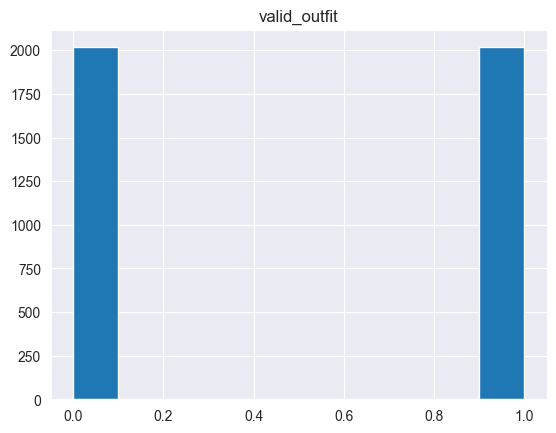

In [48]:
df_train_median.hist()

# Plot distribution q1 threshold oversampled training dataset

array([[<Axes: title={'center': 'valid_outfit'}>]], dtype=object)

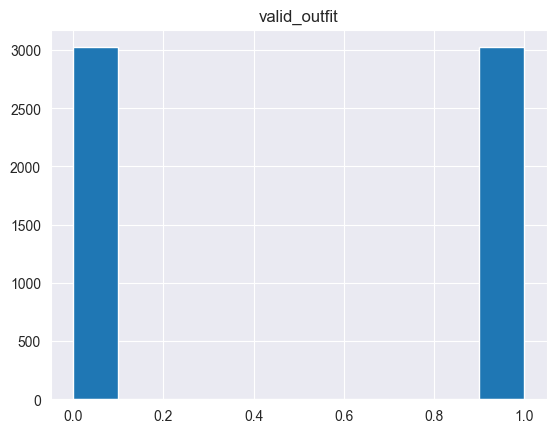

In [49]:
df_train_q1_oversampled.hist()

# Distribution of target labels in training datasets

In [58]:
print('-' *10 + ' Median training dataset ' + '-' *10)
print(df_train_median["valid_outfit"].value_counts(normalize=True))
print()
print('-' *10 + ' Q1 training dataset ' + '-' *10)
print(df_train_q1_oversampled["valid_outfit"].value_counts(normalize=True))

---------- Median training dataset ----------
valid_outfit
1    0.500124
0    0.499876
Name: proportion, dtype: float64

---------- Q1 training dataset ----------
valid_outfit
1    0.5
0    0.5
Name: proportion, dtype: float64
